# ~~Information~~ Image Retrieval

Al igual que hacemos con texto en Information Retrieval, vamos a transformar las imágenes en vectores para poder trabajar con ellos. Si tenemos vectores, podemos calcular la distancia entre vectores y, por tanto, saber qué imagen es más cercana a otra.

## ¿Cómo convertimos las imágenes en vectores?

Vamos a utilizar Inception V3 para extraer la representación de las imágenes (igual que se hace en clasificación para localizar objetos). Esta representación es el vector con el que vamos a poder calcular distancia con otros vectores de imágenes.

![CNN](docs/ir.png)

## Generar los vectores

Lo primero que tenermos que hacer es generar los vectores de las imágenes.

In [1]:
import tensorflow as tf
import os

from services.files import create_dir 
from services.inception import VectorGenerator

VECTORS_PATH = "data/vectors"
CARDS_FILE = "data/preprocess-dataset-en.csv"
IMAGES_PATH = "data/images"

def generate_features(inception, images_root, vectors_path):
    create_dir(vectors_path)
    images_path = list(map(lambda image_path: os.path.join(images_root, image_path), filter(lambda filename: ".jpg" in filename ,os.listdir(images_root)[:3])))
    image_dataset = tf.data.Dataset.from_tensor_slices(images_path)
    image_dataset = image_dataset.map(
        inception.load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(16)
    inception.reshape(image_dataset)

inception = VectorGenerator(VECTORS_PATH)

In [2]:
generate_features(inception, IMAGES_PATH, VECTORS_PATH)

## IR

Con los vectores de las imágenes, podemos calcular la distancia entre las imágenes.

In [3]:
from services.ir import IRModel

ir_model = IRModel(inception, CARDS_FILE, VECTORS_PATH)

Usamos el `VectorGenerator` para generar el vector de la imagen. A partir de ahí, simplemente tenemos que calcular la distancia mínima con el resto de vectores que tenemos.

In [4]:
from IPython.display import Image, display

def show_image(filepath):
    display(Image(filename=filepath, width = 100, height = 30))

def get_and_show_cards(filepath):
    card = ir_model.get_similar_card(filepath)
    show_image(filepath)
    show_image(os.path.join(IMAGES_PATH, card['id'] + '.jpg'))

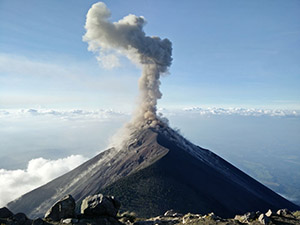

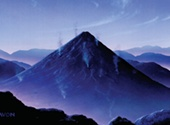

In [5]:
get_and_show_cards('test/volcan.jpg')

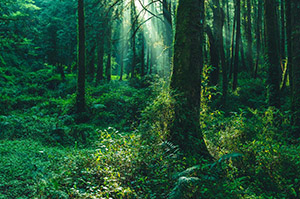

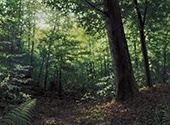

In [6]:
get_and_show_cards('test/bosque.jpg')

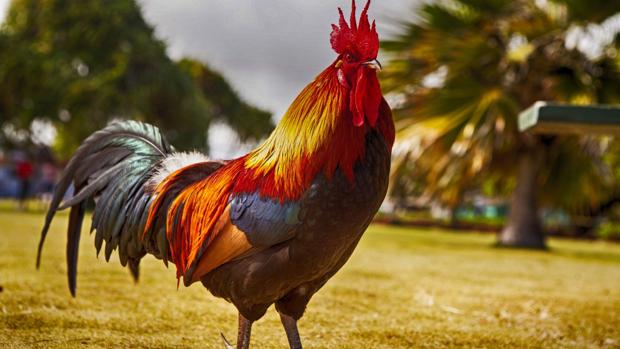

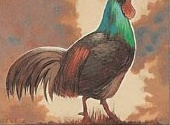

In [7]:
get_and_show_cards('test/gallo.jpg')

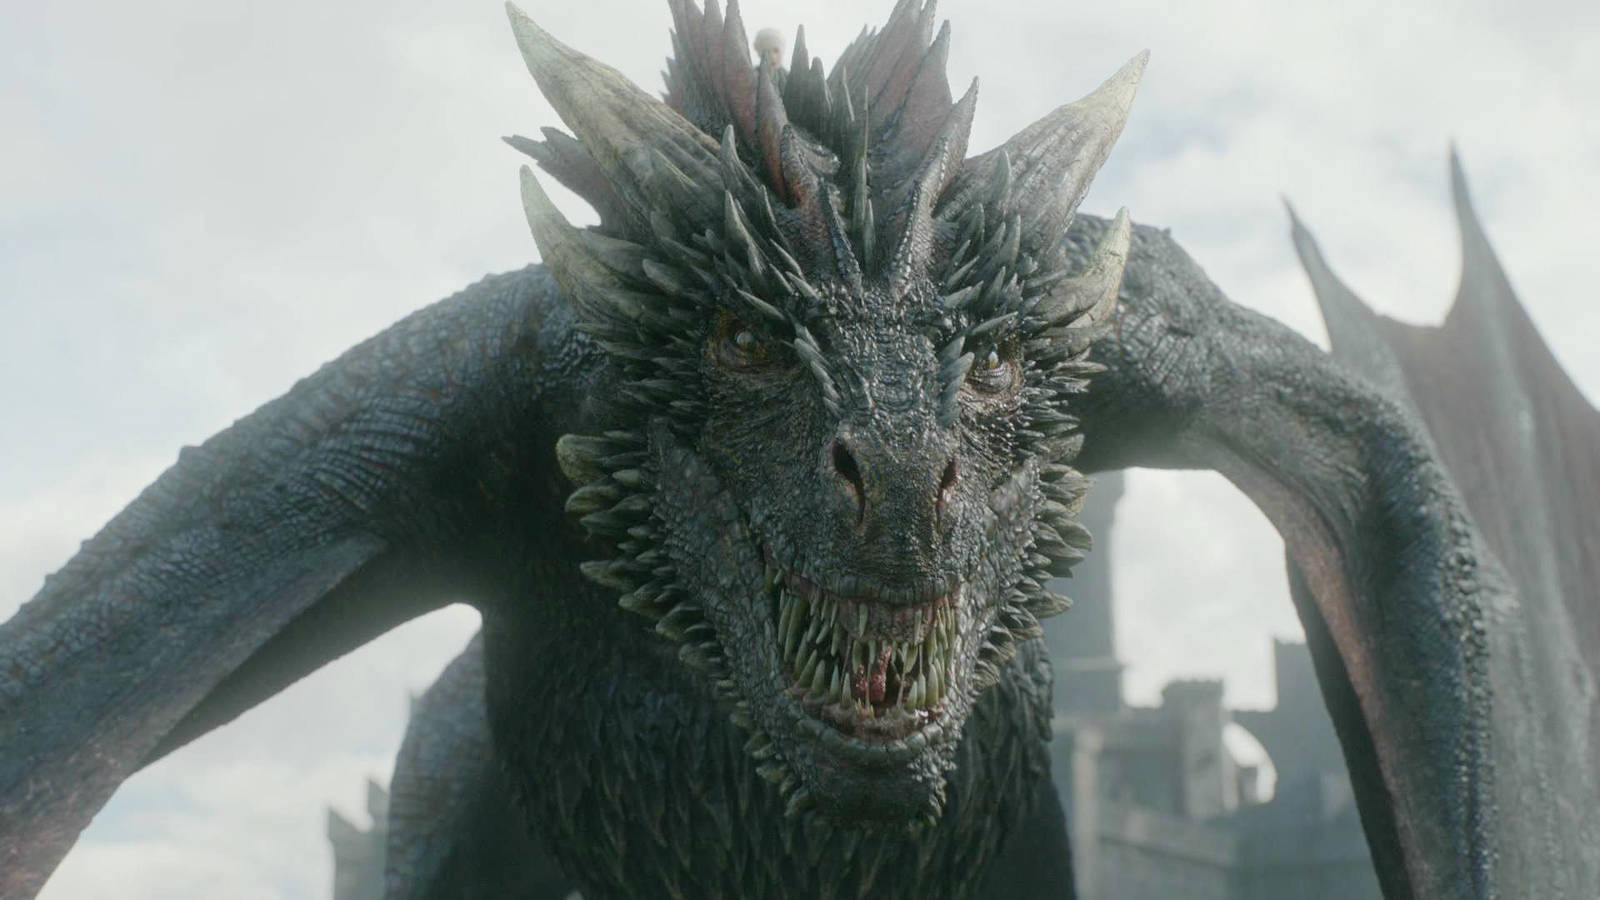

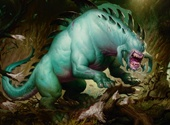

In [8]:
get_and_show_cards('test/dragon.jpg')